In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

train_dataloader = DataLoader(training_data, batch_size=60000, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=10000, shuffle=True)

train_features, train_labels = next(iter(train_dataloader))
test_features, test_labels = next(iter(test_dataloader))

print('Training data size =',train_features.size(), len(train_labels))
print('Testing data size',test_features.size(),len(train_labels))

Training data size = torch.Size([60000, 1, 28, 28]) 60000
Testing data size torch.Size([10000, 1, 28, 28]) 60000


In [4]:
train_features[0][0].shape

torch.Size([28, 28])

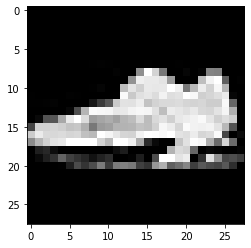

In [5]:
plt.imshow(train_features[0][0], cmap='gray')
# plt.title(labels_map[train_labels[0].values])
plt.show()

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
params = {
    'batch_size': 60000,
    'epochs': 10,
    'learning_rate': 0.01,
    'momentum': 0.9,
    'log_interval': 10,
    'test_interval': 1,
    'save_interval': 1,
    'save_dir': 'models',
    'save_name': 'model.pt',
    'cuda': True,
    'seed': 1,
    'log_dir': 'logs',
    'log_name': 'log.txt',
    'device': 'cuda:0'
}

In [8]:
model = CNN()
optimizer = torch.optim.SGD(model.parameters(), lr=params['learning_rate'], momentum=params['momentum'])
loss = torch.nn.CrossEntropyLoss()
n_epochs =10

In [9]:
if torch.cuda.is_available():
    model.to(params['device'])
    loss.to(params['device'])

In [10]:
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [11]:
def train(model):
    # model.train()
    train_loss = 0
    x_train , y_train = train_features, train_labels
    x_test , y_test = test_features, test_labels
    if torch.cuda.is_available():
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        # x_test = x_test.cuda()
        # y_test = y_test.cuda()
    
    optimizer.zero_grad()
    output = model(x_train)
    loss_train = loss(output, y_train)
    loss_train.backward()
    optimizer.step()
    train_loss += loss_train.item()
    if epoch%2 == 0:
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss / len(x_train)))

In [12]:
for epoch in range(n_epochs):
    train(model)
    torch.cuda.empty_cache()

Epoch: 1 	Training Loss: 0.000038
Epoch: 3 	Training Loss: 0.000038
Epoch: 5 	Training Loss: 0.000038
Epoch: 7 	Training Loss: 0.000038
Epoch: 9 	Training Loss: 0.000038
